In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [2]:
Train_X=pd.read_csv("Logistic_X_Train.csv")
Train_Y=pd.read_csv("Logistic_Y_Train.csv")
Test_X=pd.read_csv("Logistic_X_Test.csv")


In [3]:
Test_X.head()

,f1,f2,f3
0,-0.767508,-0.261859,-2.514831
1,-1.241653,1.449001,-0.413089
2,1.925270,1.931761,1.342619
3,-1.298255,1.049761,-0.527319
4,-0.964712,0.938088,-1.186328


In [4]:
Com=Train_X.join(Train_Y)

In [5]:
Com.head()

,f1,f2,f3,label
0,-1.239375,0.749101,-0.528515,1
1,-1.036070,0.801436,-1.283712,1
2,-0.615579,1.579521,-1.391927,1
3,1.335978,1.348651,1.433564,0
4,0.658925,1.300019,0.571603,0


In [6]:
X_train = Train_X.values
Y_train = Train_Y.values

X_test = Test_X.values

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)


(3000, 3)
(3000, 1)
(1000, 3)


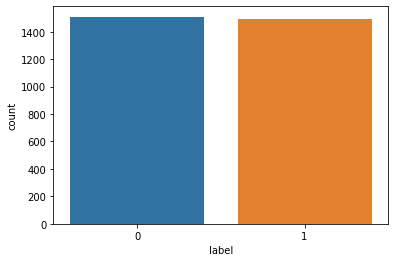

In [7]:
sns.countplot(x="label",data=Com)

In [8]:
class_0=Train_X.loc[(Train_Y['label']==0)]
class_1=Train_X.loc[(Train_Y['label']==1)]


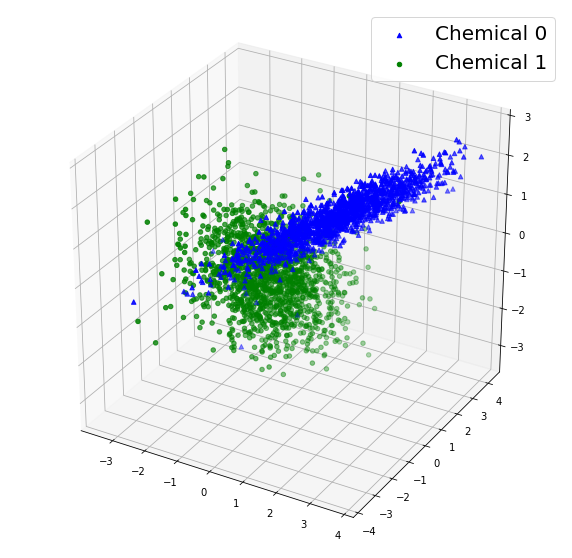

In [9]:
fig = plt.figure(figsize=(10,10))
axs=plt.axes(projection='3d')
axs.scatter3D(class_0['f1'],class_0['f2'],class_0['f3'],label='Chemical 0',color='blue',marker='^')
axs.scatter3D(class_1['f1'],class_1['f2'],class_1['f3'],label='Chemical 1',color='green')
axs.legend(fontsize=20)

In [10]:
Com.isnull()

,f1,f2,f3,label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2995,False,False,False,False
2996,False,False,False,False
2997,False,False,False,False
2998,False,False,False,False


In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logmodel=LogisticRegression()

In [20]:
logmodel.fit(Train_X,Train_Y)
coeff=logmodel.coef_
intercept=logmodel.intercept_
print(coeff,intercept)

[[-3.92798396  3.10147056 -2.28040541]] [-4.27017148]


F:\ANACONDAISHERE\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
prediction=logmodel.predict(Test_X)
df=pd.DataFrame(prediction)

class0_prediction=Test_X.loc[(prediction==0)]
class1_prediction=Test_X.loc[(prediction==1)]

In [15]:
df.columns=["Predicted Output"]
df.head()

,Predicted Output
0,1
1,1
2,0
3,1
4,1


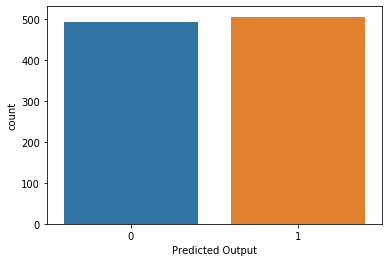

In [16]:
sns.countplot("Predicted Output",data=df)

In [23]:
acc_log = round(logmodel.score(Train_X,Train_Y) * 100, 2)
acc_log

99.53

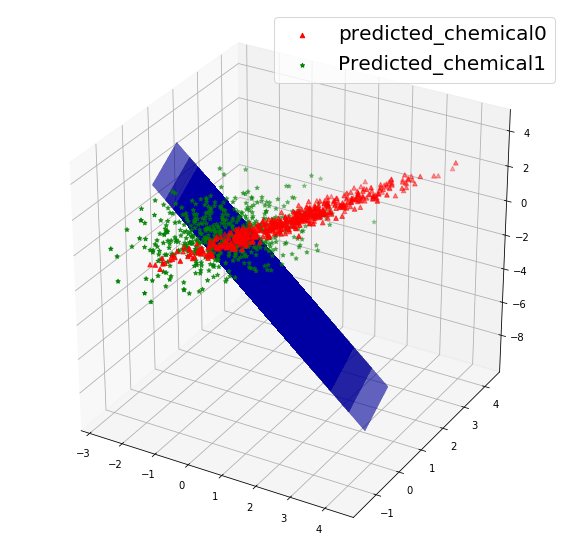

In [29]:
fig = plt.figure(figsize=(10,10))
axs=plt.axes(projection='3d')
xx, yy = np.meshgrid(Test_X, Train_Y)
z=-((coeff[0][1]*yy+coeff[0][0]*xx+intercept)/coeff[0][2])
axs.plot_surface(xx,yy,z,alpha=0.02,color='blue')
axs.scatter3D(class0_prediction['f1'],class0_prediction['f2'],class0_prediction['f3'],marker='^',label='predicted_chemical0',color='red')
axs.scatter3D(class1_prediction['f1'],class1_prediction['f2'],class1_prediction['f3'],marker='*',label='Predicted_chemical1',color='green')
axs.legend(fontsize=20)